![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [162]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import tensorflow as tf
print("Versión de TensorFlow:", tf.__version__)

import keras
print("Versión de Keras (integrado en TensorFlow):", keras.__version__)
import warnings
warnings.filterwarnings('ignore')
!pip install tensorflow
import seaborn as sns
from keras import backend as K
!pip install livelossplot
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

Versión de TensorFlow: 2.13.0
Versión de Keras (integrado en TensorFlow): 2.13.1


Para el presente proyecto se estn usando las siguientes versiones:

**Versión de TensorFlow: 2.13.0**

**Versión de Keras (integrado en TensorFlow): 2.13.1**

In [71]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


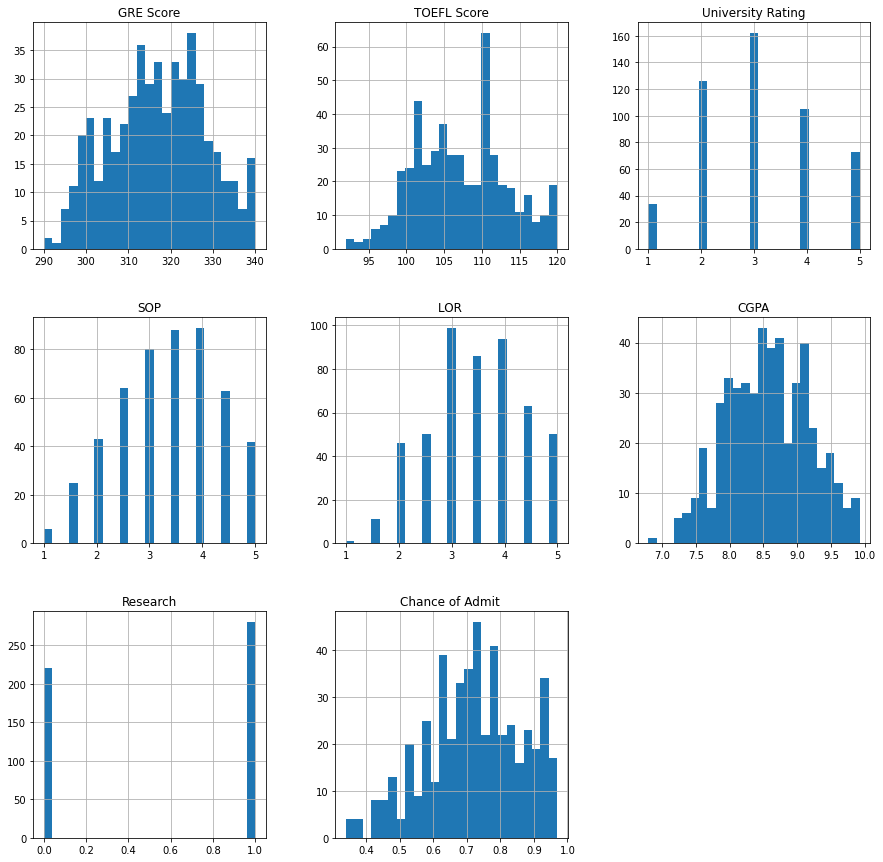

In [72]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [73]:
# Cantidad de registros
data.shape[0]

500

In [74]:
#cantidad de variables
data.shape[1]

8

In [75]:
#Descripción de los tipos de datos, nombres y registros
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


Se observa que hay 500 registros en total, 8 variables en total, una variable a predecir y siete variables descriptivas,no hay datos nulos y todas las variables descriptivas e independiente son de tipo numerico.

In [76]:
# Estadisticos descriptivos de la data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [77]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


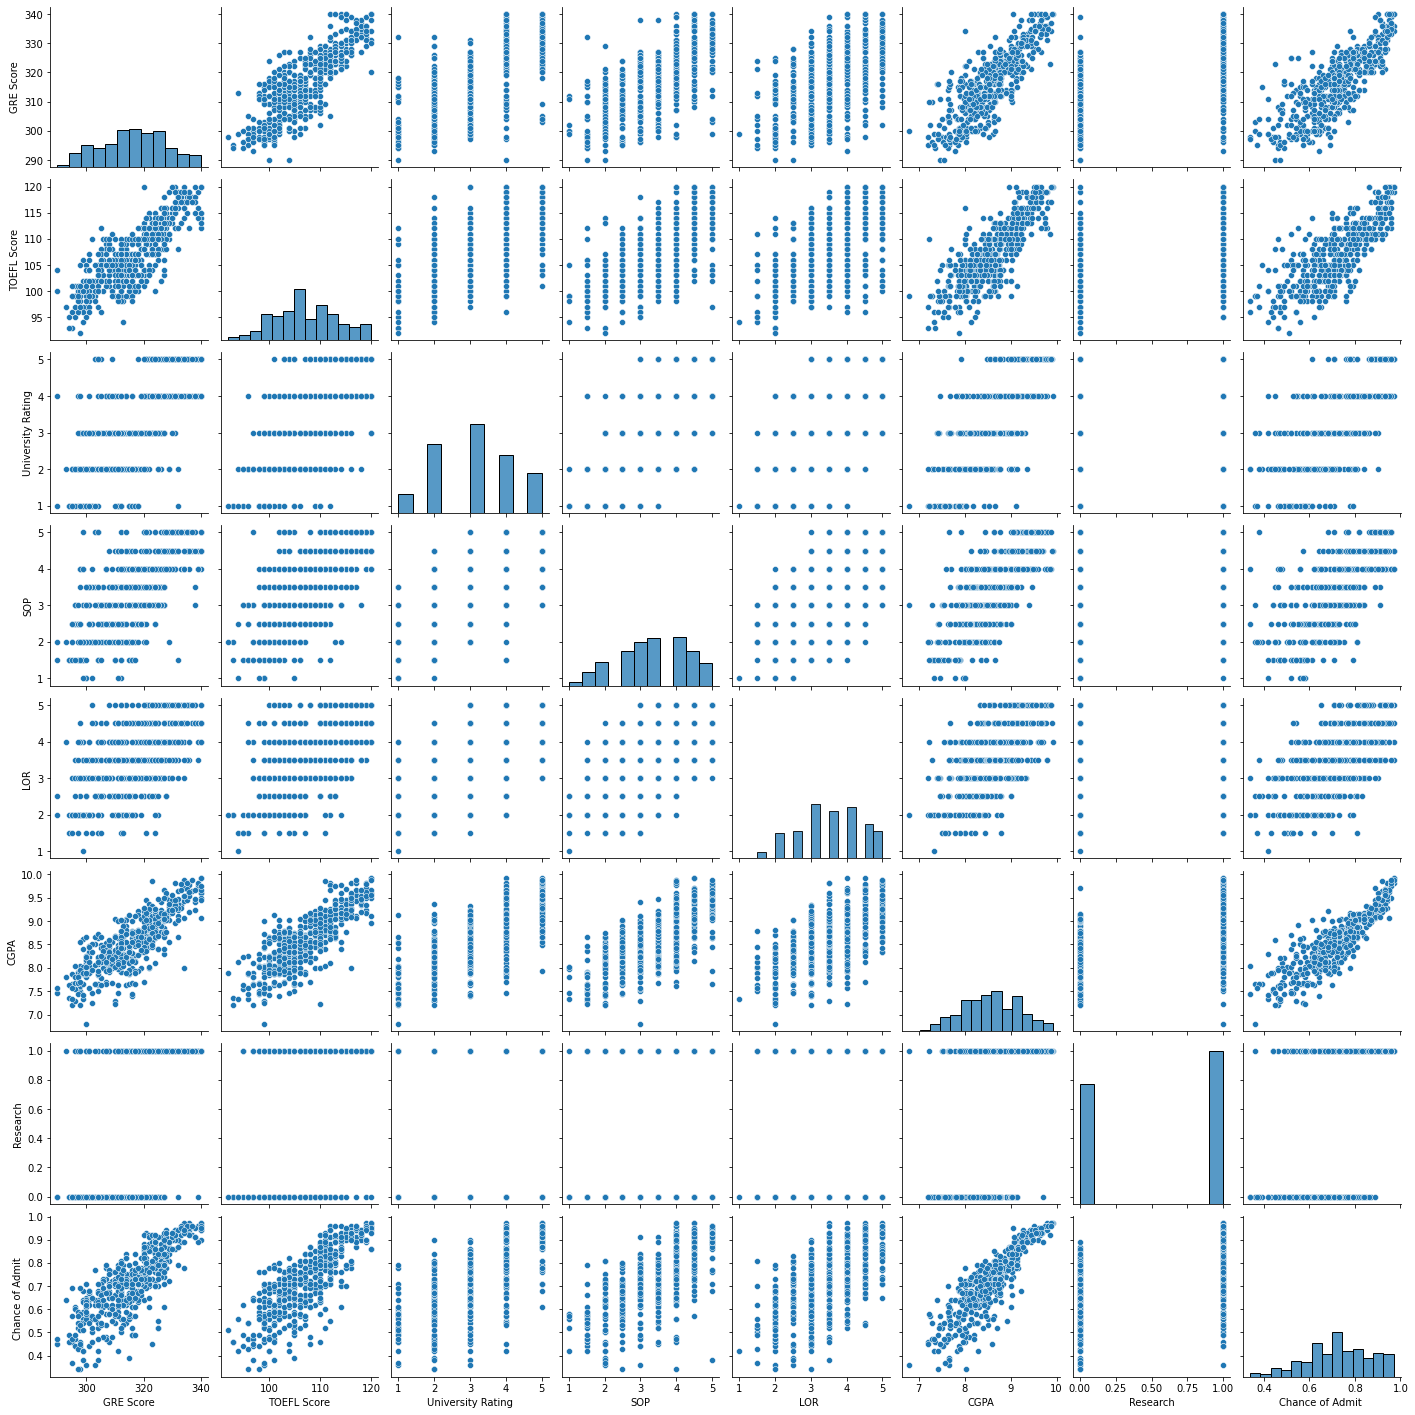

In [78]:
# Correlogramas de las variables descriptivas 
sns.pairplot(data)

A partir de los estadísticos descriptivos, se pueden observar las distribuciones de cada una de las variables, por un lado, se puede observar que la tendencia central en el puntaje GRE oscila por los 316, vemos que la media y la mediana están muy cerca, por lo que la distribución está bastante centrada, y los valores totales oscilan entre los 340 y 290, como se puede observar en el correlograma, esta variable tiene una distribución bastante normal. Con respecto, al puntaje TOEFL vemos también una distribución bastante normal y centrada como se ve su media y mediana son casi exactamente iguales y los valores oscilan entre 120 y 92. Asimismo, la mayoría de las variables poseen este comportamiento normal centrado. Con respecto a los diagramas de dispersión y la matriz de correlaciones, es posible observar que para todos los indicadores existe una correlación positiva fuerte, es decir, a medida que cada variable explicativa incrementa, la probabilidad de admisión también incrementa. Con esta información, se espera obtener un modelo con buen poder predictivo, ya que las variables explicativas están fuertemente correlacionadas con la variable a predecir. También, es importante tener en cuenta que varias variables están fuertemente correlacionadas positivamente unas con otras, como por ejemplo el CGPA y los TOEFL y GRE, por lo que habría que tener en cuenta el concepto de redundancia.

In [81]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [82]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [83]:
# Escalamos el train y test set, que es importante antes de entrenar la red neuronal

scaler = StandardScaler()
x_Train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
x_Test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

x_Train = np.array(x_Train)
y_Train = np.array(yTrain)

x_Test = np.array(x_Test)
y_Test = np.array(yTest)

In [84]:
# Celda 1
#definimos la cantidad de variables a ingresar a la red neuronal
dims = x_Train.shape[1]

# Se define el modelo con la funcion Sequential.
model_50 = Sequential()
model_50.add(Dense(1, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model_50.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [85]:
#Se elige inicialmente como optimizador stochastic gradient descent y como función de perdida el MSE
model_50.compile(optimizer='sgd', loss='mean_squared_error')

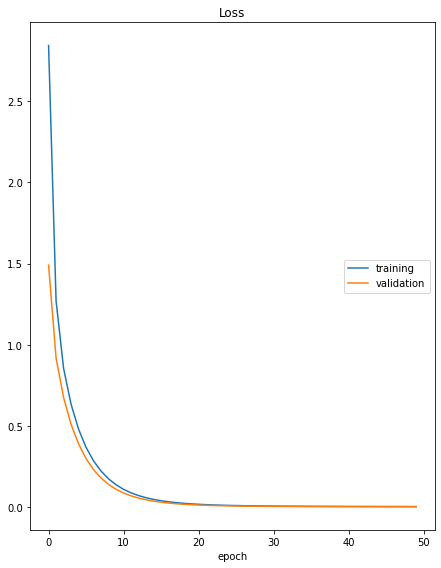

Loss
	training         	 (min:    0.004, max:    2.843, cur:    0.004)
	validation       	 (min:    0.003, max:    1.491, cur:    0.003)


In [86]:
# se entrena el modelo con 50 epocas
model_50.fit(x_Train, y_Train, 
          verbose=0, 
          epochs=50, 
          validation_data=(x_Test, y_Test),
          callbacks=[PlotLossesKeras()])

In [87]:
#Se calcula el MSE con 50 epocas
mse_capa_50 = mean_squared_error(y_Test,model_50.predict(x_Test))
print(mse_capa_50)

5/5 [==============================] - 0s 4ms/step
0.003449730570801714


In [88]:
model_100 = Sequential()
model_100.add(Dense(1, input_shape=(dims,)))
model_100.compile(optimizer='sgd', loss='mean_squared_error')

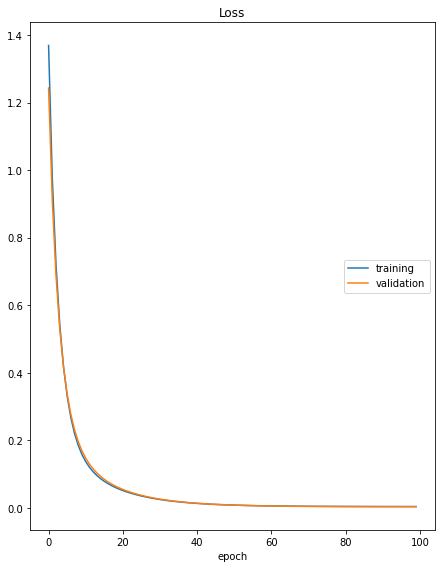

Loss
	training         	 (min:    0.004, max:    1.369, cur:    0.004)
	validation       	 (min:    0.003, max:    1.243, cur:    0.003)


In [89]:
model_100.fit(x_Train, y_Train, 
          verbose=0, 
          epochs=100, 
          validation_data=(x_Test, y_Test),
          callbacks=[PlotLossesKeras()])

In [90]:
#calculamos el MSE para la red con 100 epocas, se puede observar un decremento del MSE y convergencia entre la perdida
#de entrenamiento y de validación, por lo que elegimos usar 100 epocas para el análisis
mse_capa_100 = mean_squared_error(y_Test,model_100.predict(x_Test))
mse_capa_100

5/5 [==============================] - 0s 2ms/step


0.0033039276034194137

In [91]:
#declaramos multiples optimizadores y distintas funciones de perdida para iterar sobre ellas:
opti = ['sgd','adam','rmsprop','adagrad','adadelta','nadam']
L = ['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error','huber_loss','logcosh']

5/5 [==============================] - 0s 2ms/step


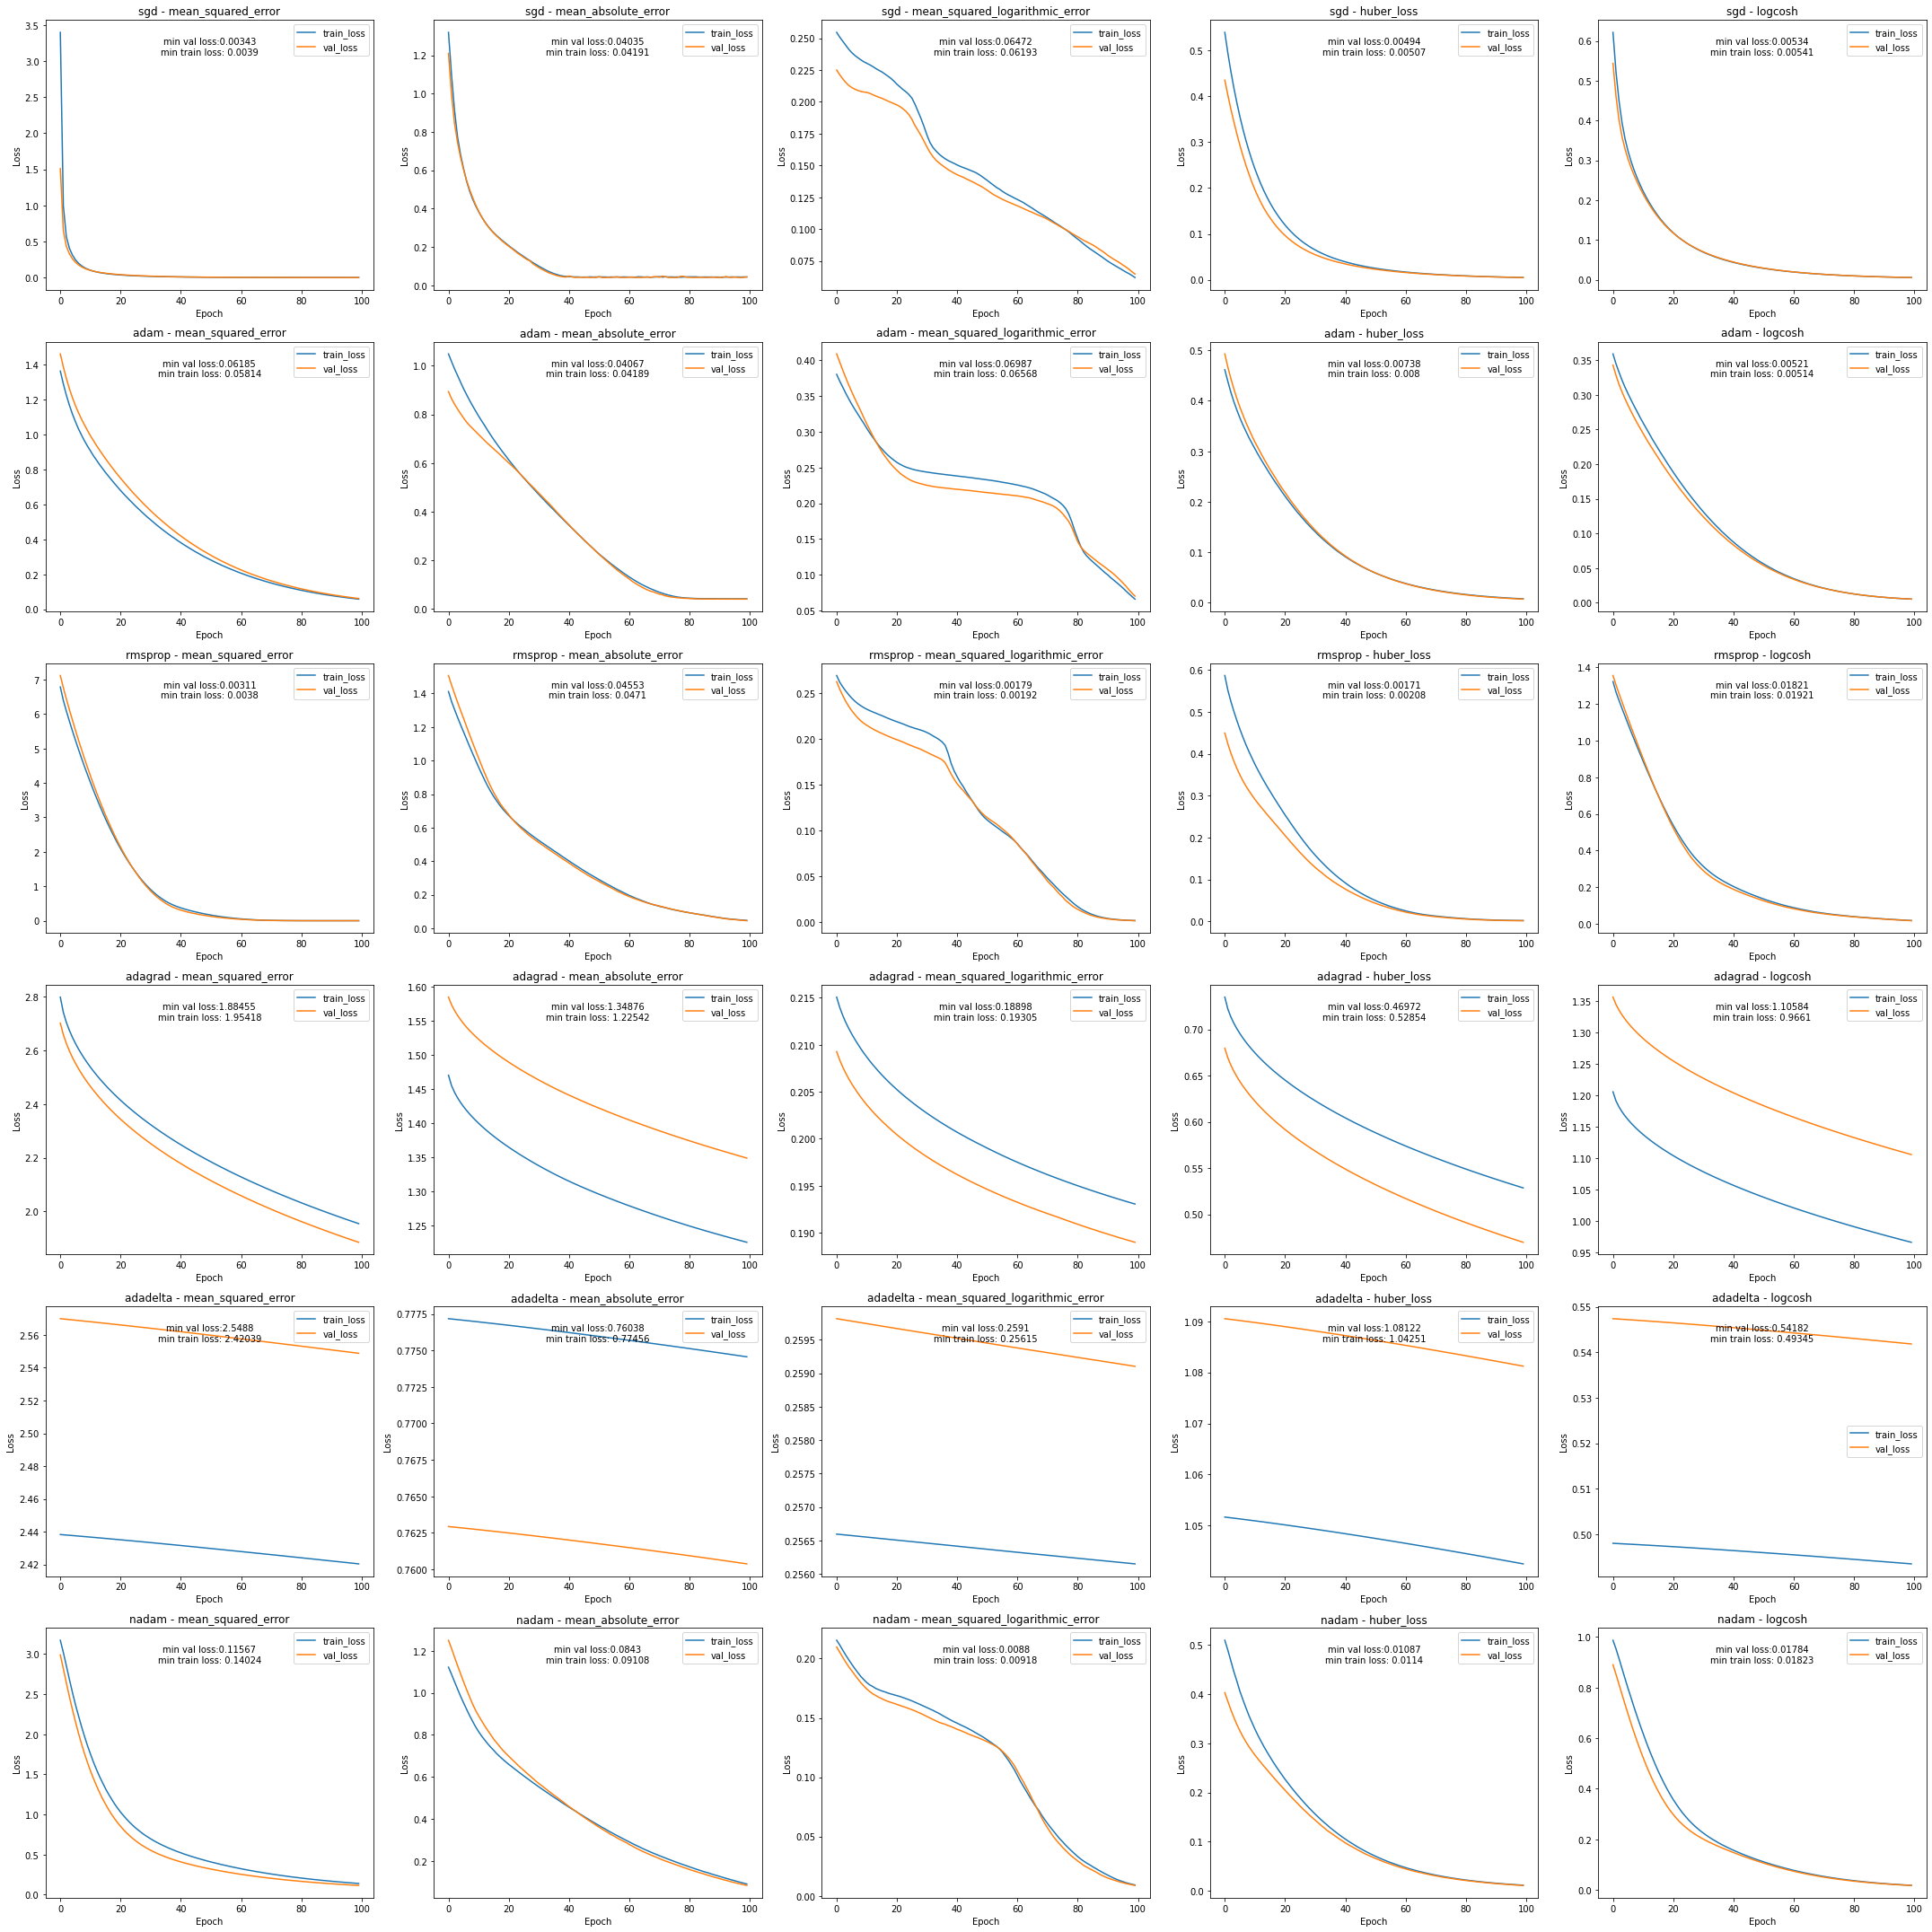

In [96]:
# Para evaluar las distintas posibilidades con funciones de perdida y optimizadores distintos iteramos sobre estas combinaciones
# para encontrar la mejor combinación y entrenar el modelo con dicha combinación

losses = {}
mses = {}

r = len(opti)
c = len(L)

# Crear la figura y los ejes para las gráficas
fig, axes = plt.subplots(r, c, figsize=(30, 30))
for i,opt in enumerate(opti):
    K.clear_session()
    for j,loss in enumerate(L):
        model = Sequential()
        model.add(Dense(1, input_shape=(dims,)))
        model.compile(optimizer=opt, loss=loss),
        hist = model.fit(x_Train, y_Train, 
          verbose=0, 
          epochs=100, 
          validation_data=(x_Test, y_Test))#,
          #callbacks=[PlotLossesKeras()])
            
        train_loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        min_train_loss = round(min(train_loss),5)
        min_val_loss = round(min(val_loss),5)
        
        # Graficar las pérdidas de entrenamiento y validación
        ax = axes[i, j]
        ax.plot(train_loss, label='train_loss')
        ax.plot(val_loss, label='val_loss')
        ax.set_title(f'{opt} - {loss}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.text(0.5, 0.9,f'min val loss:{min_val_loss}\nmin train loss: {min_train_loss}', 
        horizontalalignment='center', verticalalignment='center',transform=ax.transAxes)
        ax.legend()
        mses[(opt,loss)] = mean_squared_error(y_Test,model.predict(x_Test))
plt.tight_layout()
plt.show()

In [97]:
# obtenemos la mejor combinación
best_fl = min(mses, key=mses.get)
print(best_fl)

('rmsprop', 'mean_squared_error')


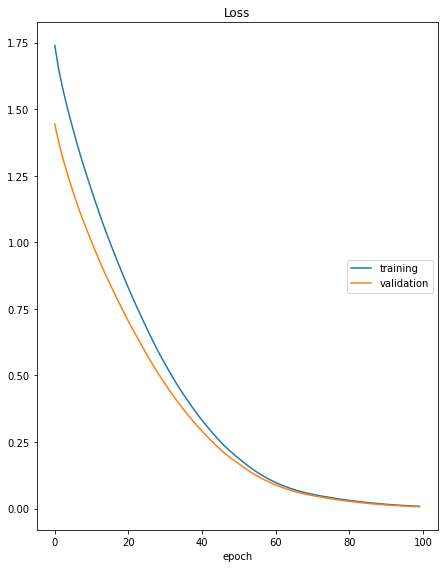

Loss
	training         	 (min:    0.009, max:    1.739, cur:    0.009)
	validation       	 (min:    0.007, max:    1.444, cur:    0.007)


In [98]:
# Entrenamos el modelo con la mejor combinación, en esete caso con optimizador stochastic gradient descent y con función de
#perdida el MSE
best_model = Sequential()
best_model.add(Dense(1, input_shape=(dims,)))
best_model.compile(optimizer=best_fl[0], loss=best_fl[1]),
hist = best_model.fit(x_Train, y_Train, 
  verbose=0, 
  epochs=100, 
  validation_data=(x_Test, y_Test),
  callbacks=[PlotLossesKeras()])

In [46]:
mse_capa_test = mean_squared_error(y_Test,best_model.predict(x_Test))
mae_capa_test = mean_absolute_error(y_Test,best_model.predict(x_Test))
mse_capa_train = mean_squared_error(y_Train,best_model.predict(x_Train))
mae_capa_train = mean_absolute_error(y_Train,best_model.predict(x_Train))
print(f'MSE Test:{mse_capa_test}\nMAE Test:{mae_capa_test}\nMSE Train:{mse_capa_train}\nMAE Test:{mae_capa_train}')

11/11 [==============================] - 0s 4ms/step
MSE Test:0.0031726407935109913
MAE Test:0.04125356914997101
MSE Train:0.003760894380175476
MAE Test:0.04357447553021567


Se entrenó una red neuronal de una única capa iterando sobre múltiples funciones de perdida y sobre distintos optimizadores, el mejor desempeño del modelo para 100 épocas se obtuvo con la combinación de hiper parámetros: optimizer=rmsprop y loss: mean_squared_error. Esto quiere decir que la alta sensibilidad a valores altos de perdida producto de la naturaleza cuadratica de esta función de perdida en este caso produjo el mejor rendimiento predictivo del modelo. 

El mejor optimizador fue el “Root Mean Square Propagation”; la selección del optimizador es un paso importante en la calibración de la red neuronal, debido a que esta influye en la velocidad de convergencia del modelo, la estabilidad del entrenamiento y el poder predictivo del modelo resultante. En este caso, el optimizador maneja una tasa de aprendizaje adaptativa para cada parámetro y que depende de la magnitud de los gradientes pasados del parámetro. Este optimizador ayuda a la rápida convergencia y evitar inestabilidad en el entrenamiento. 

Finalmente es importante destacar la matriz de figuras obtenidas a partir de las distintas combinaciones de optimizadores y funciones de perdida, pues es sencillo ver la influencia de estos sobre la convergencia y reducción de la perdida contra las épocas. Observando así que, con la combinación obtenida, aunque no se reduce con mayor velocidad la perdida que con la combinación “Stochastic gradient descent” y MSE, si se obtienen los valores mínimos de perdida y el mejor desempeño predictivo contra el set de test al emplear la función MSE. Es importante destacar que no todas las combinaciones generan buenos desempeños e incluso en algunos optimizadores como en el caso de “adadelta” no se alcanza la convergencia.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [99]:
activation = ['relu','tanh','linear','softmax','leaky_relu']
neuronas = range(150,500,50)

5/5 [==============================] - 0s 2ms/step


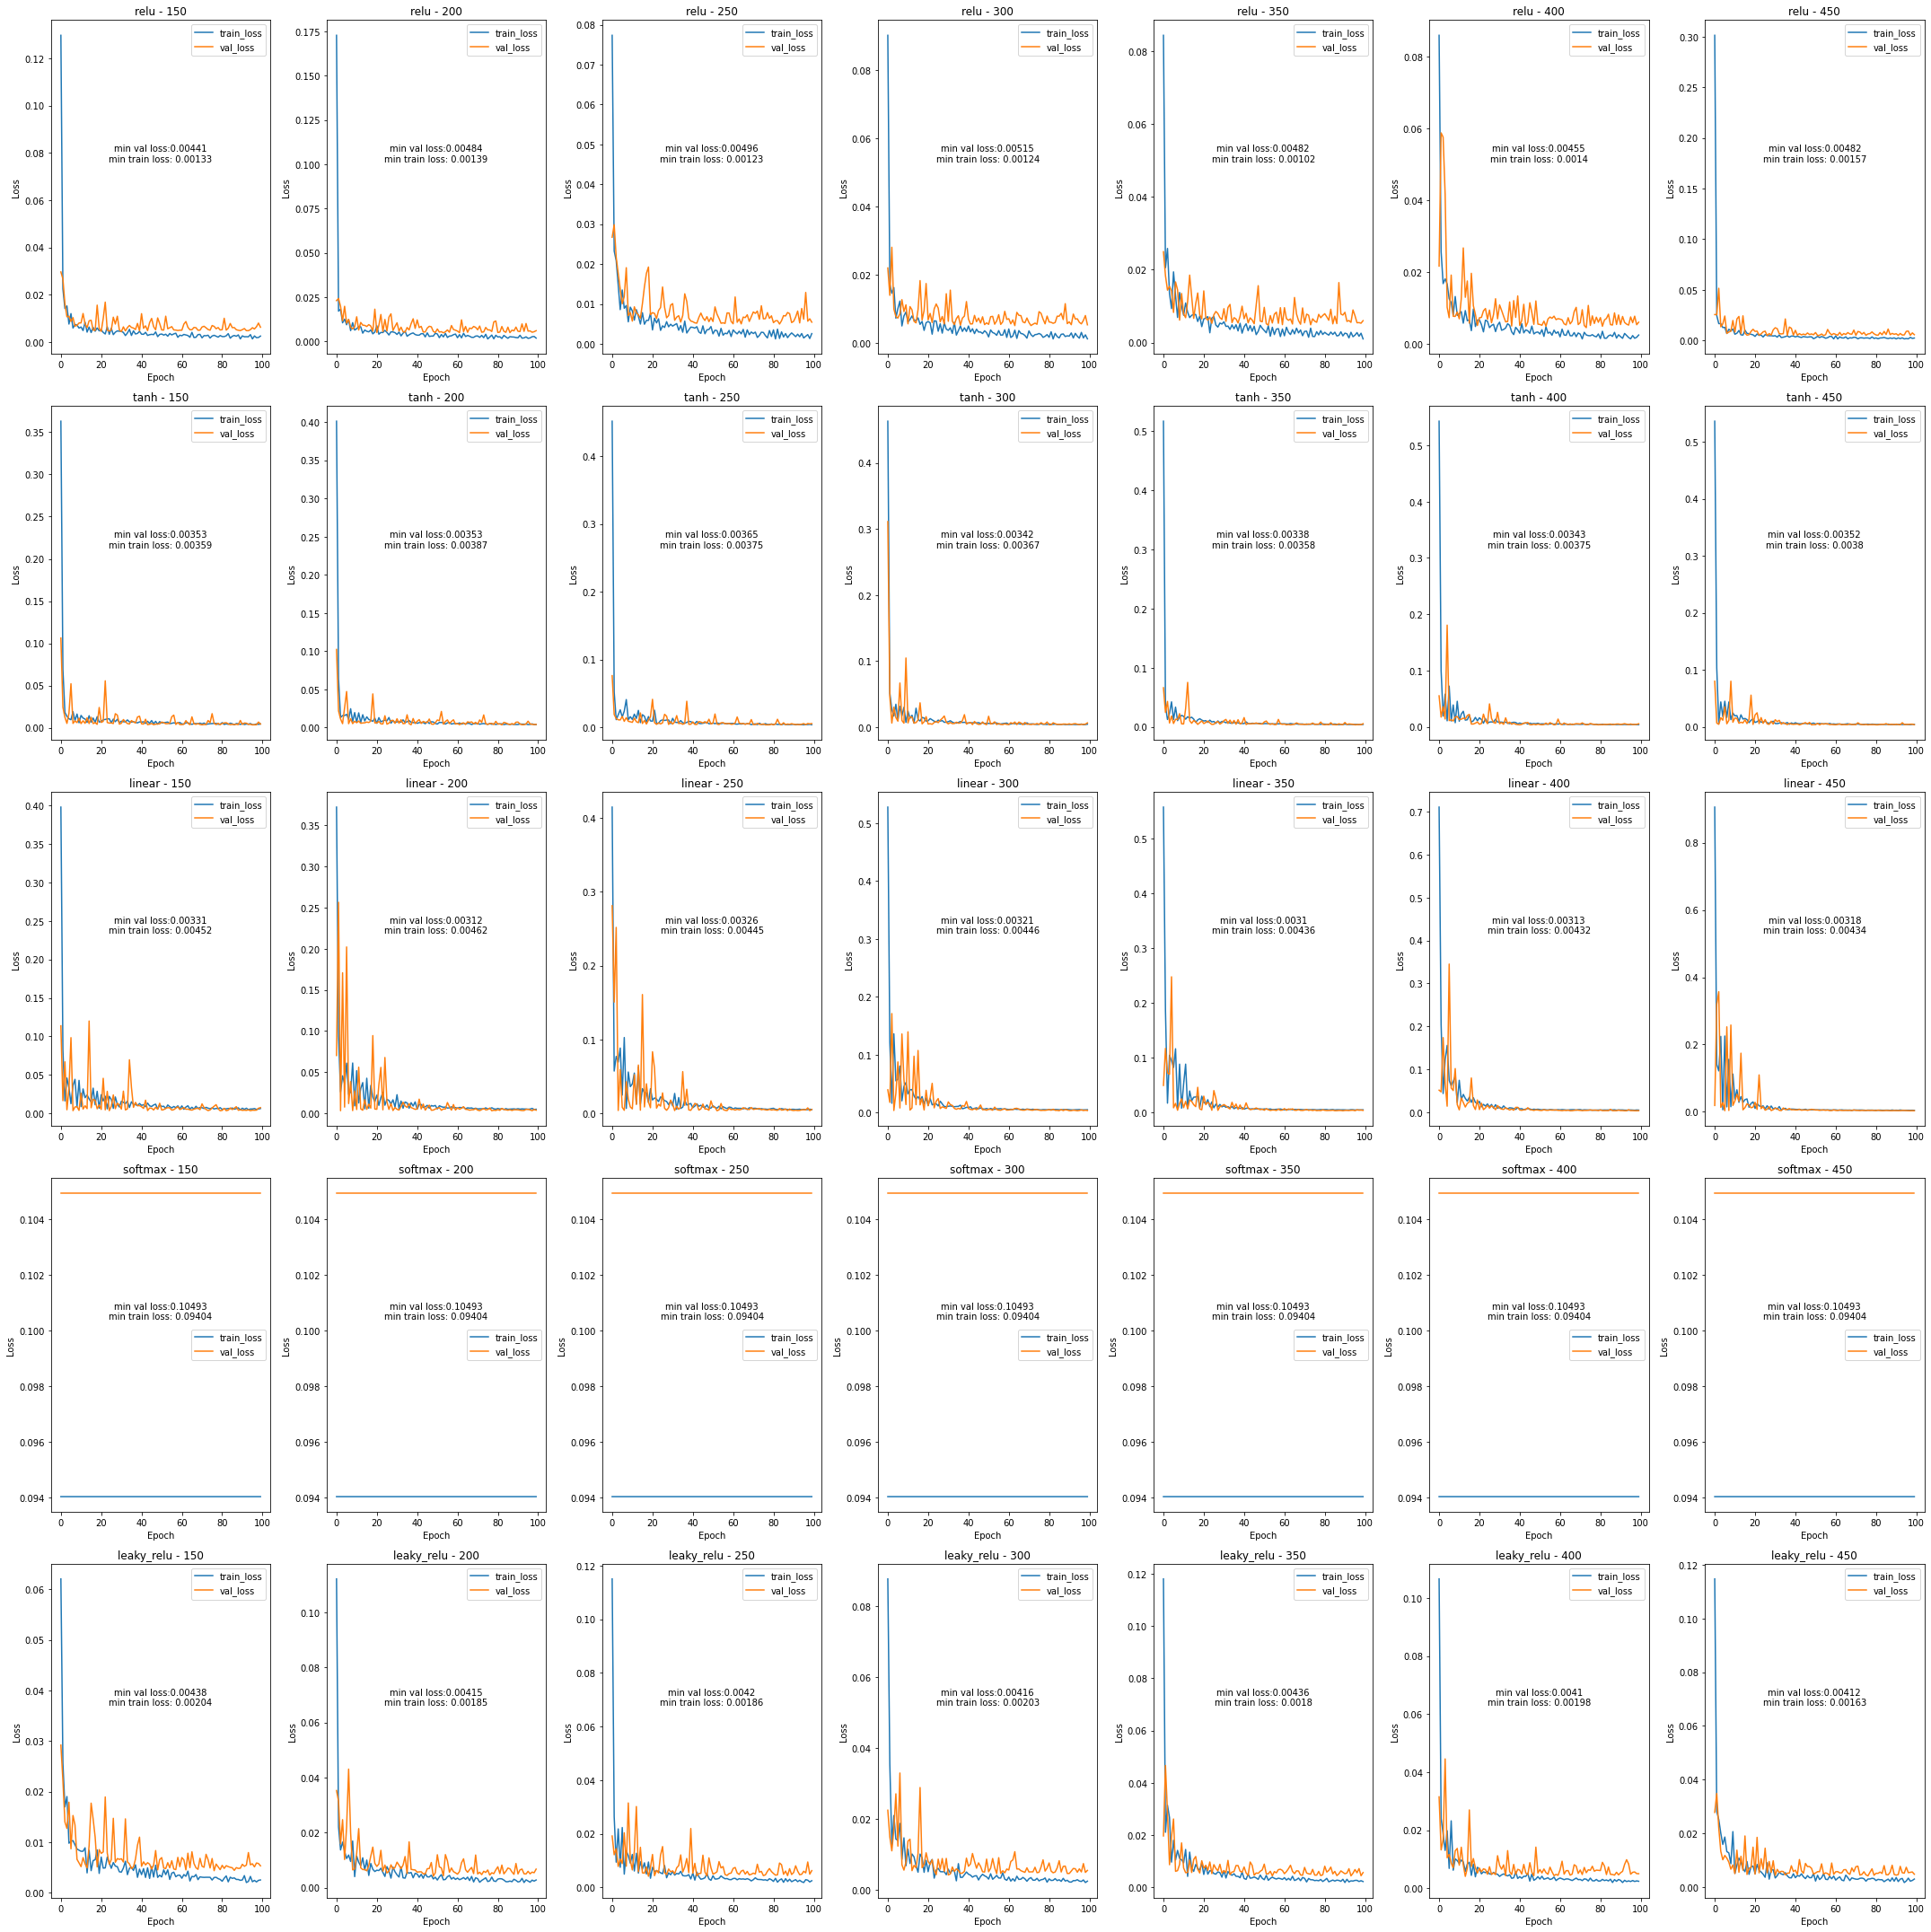

In [100]:
# Celda 2
losses = {}
mses = {}

r = len(activation)
c = len(neuronas)

# Crear la figura y los ejes para las gráficas
fig, axes = plt.subplots(r, c, figsize=(30, 30))
for i,act in enumerate(activation):
    K.clear_session()
    for j,neu in enumerate(neuronas):
        
        model = Sequential()
        model.add(Dense(neu, input_shape=(dims,),activation = act))
        model.add(Dense(neu-round(neu*0.6), activation = act))
        model.add(Dense(1,activation=act)) 
        
        model.compile(optimizer=best_fl[0], loss=best_fl[1]),
        hist = model.fit(x_Train, y_Train, 
          verbose=0, 
          epochs=100, 
          validation_data=(x_Test, y_Test))#,
          #callbacks=[PlotLossesKeras()])
            
        train_loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        
        min_train_loss = round(min(train_loss),5)
        min_val_loss = round(min(val_loss),5)
        
        # Graficar las pérdidas de entrenamiento y validación
        ax = axes[i, j]
        ax.plot(train_loss, label='train_loss')
        ax.plot(val_loss, label='val_loss')
        ax.set_title(f'{act} - {neu}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.text(0.5, 0.6,f'min val loss:{min_val_loss}\nmin train loss: {min_train_loss}', 
        horizontalalignment='center', verticalalignment='center',transform=ax.transAxes)
        ax.legend()
        mses[(act,neu)] = mean_squared_error(y_Test,model.predict(x_Test))
plt.tight_layout()
plt.show()

In [101]:
# obtenemos la mejor combinación
best_ac = min(mses, key=mses.get)
print(best_ac)

('linear', 450)


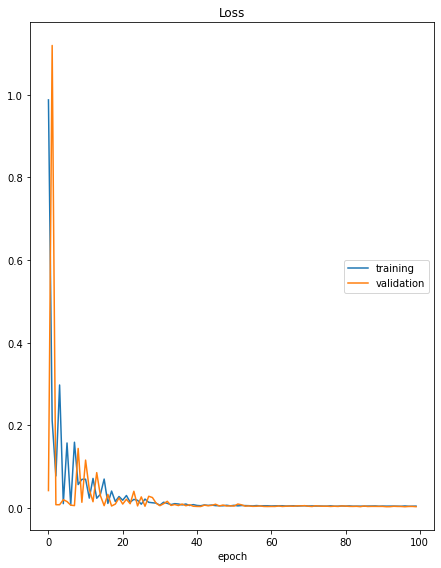

Loss
	training         	 (min:    0.004, max:    0.987, cur:    0.005)
	validation       	 (min:    0.003, max:    1.119, cur:    0.003)


In [113]:
K.clear_session()
best_model_2_inter = Sequential()
best_model_2_inter.add(Dense(best_ac[1], input_shape=(dims,),activation = best_ac[0]))
best_model_2_inter.add(Dense(best_ac[1]-round(best_ac[1]*0.6), activation = best_ac[0]))
best_model_2_inter.add(Dense(1,activation=best_ac[0])) 
best_model_2_inter.compile(optimizer=best_fl[0], loss=best_fl[1]),
hist = best_model_2_inter.fit(x_Train, y_Train, 
  verbose=0, 
  epochs=100, 
  validation_data=(x_Test, y_Test),
  callbacks=[PlotLossesKeras()])

In [147]:
mse_capa2_test = mean_squared_error(y_Test,best_model_2_inter.predict(x_Test))
mae_capa2_test = mean_absolute_error(y_Test,best_model_2_inter.predict(x_Test))
mse_capa2_train = mean_squared_error(y_Train,best_model_2_inter.predict(x_Train))
mae_capa2_train = mean_absolute_error(y_Train,best_model_2_inter.predict(x_Train))
print(f'MSE Test:{mse_capa2_test}\nMAE Test:{mae_capa2_test}\nMSE Train:{mse_capa2_train}\nMAE Test:{mae_capa2_train}')

11/11 [==============================] - 0s 3ms/step
MSE Test:0.0032514206530042007
MAE Test:0.04109666533470154
MSE Train:0.004038480279547821
MAE Test:0.04505330278873444


Para el caso de aplicación de la red neuronal de 2 capas, se implementó la misma función de perdida y optimizador hallados en el punto anterior y se iteró sobre la función de activación y sobre el número de neuronas de la capa. En este punto la mejor función de activación fue la función "linear" y el número total de neuronas de 450; en la capa inmediatamente anterior se aplicó una reducción del 60% para reducir la complejidad y sobreajuste del modelo.Es muy probable que la función de activación que mejor se adapta a este conjunto de datos sea la lineal debido al comportamiento y correlaciones lineales de los datos con respecto a la variable a predecir.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [150]:
es = EarlyStopping(monitor='val_loss', patience=20, verbose=1) 

In [151]:
best_model = ModelCheckpoint('best_model.h5', verbose=0, save_best_only=True)

In [152]:
capas = range(3,11)

Epoch 71: early stopping
5/5 [==============================] - 0s 2ms/step
Epoch 39: early stopping
5/5 [==============================] - 0s 7ms/step
Epoch 40: early stopping
5/5 [==============================] - 0s 4ms/step
Epoch 42: early stopping
5/5 [==============================] - 0s 7ms/step
Epoch 54: early stopping
5/5 [==============================] - 0s 6ms/step
Epoch 58: early stopping
5/5 [==============================] - 0s 7ms/step
Epoch 63: early stopping
5/5 [==============================] - 0s 4ms/step
Epoch 44: early stopping
5/5 [==============================] - 0s 6ms/step


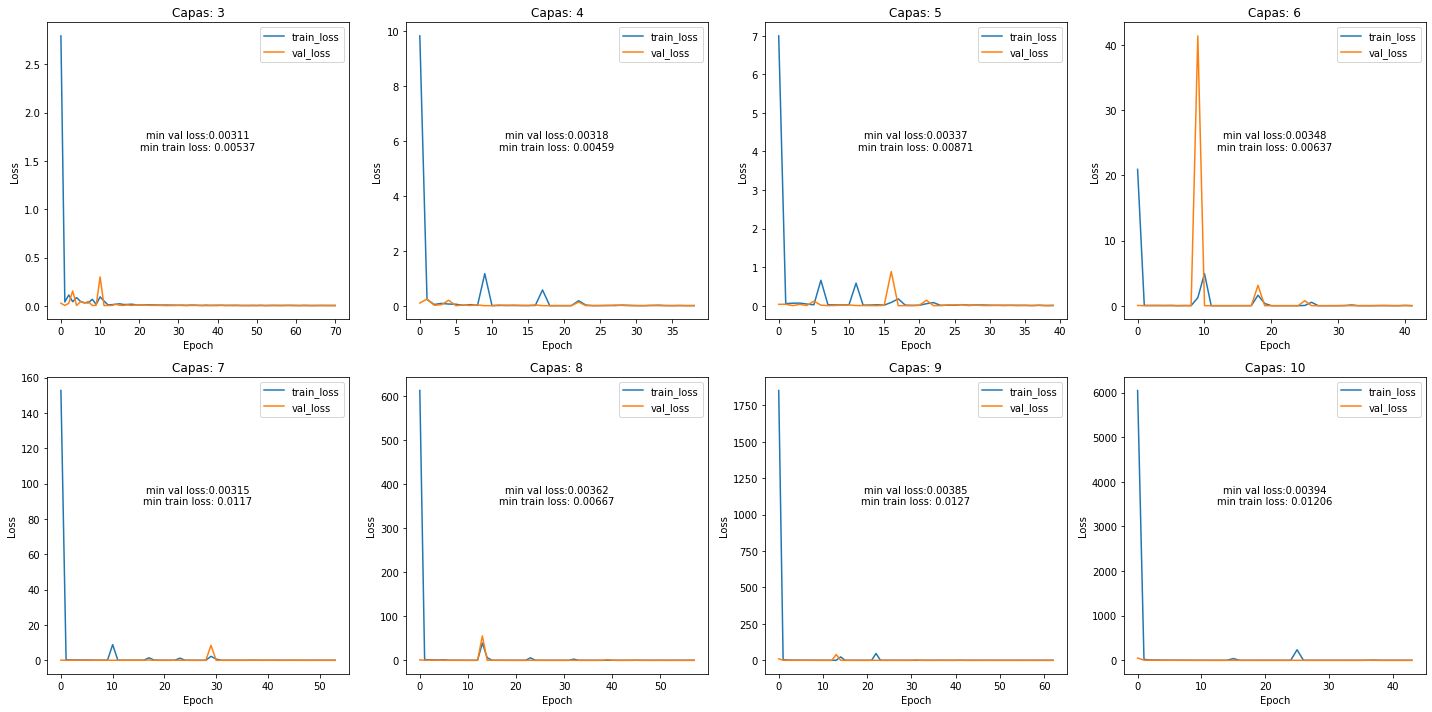

In [153]:
# Celda 3
# se modifica la tasa de reduccion de neuronas a un valor mas alto, teniendo en cuenta que ahora se van a implementar mas capas
losses = {}
mses = {}

r= 2
c= int(len(capas)/2)

# Crear la figura y los ejes para las gráficas
fig, axes = plt.subplots(r, c, figsize=(20, 10))
for i,capa in enumerate(capas): 
    model = Sequential()
    model.add(Dense(best_ac[1], input_shape=(dims,),activation = best_ac[0]))
    for _ in range(1,capa):
        model.add(Dense(best_ac[1]-round(best_ac[1]-best_ac[1]*0.8), activation = best_ac[0]))
        if _%2 == 0:
            model.add(Dropout(0.3)) 
    model.add(Dense(1,activation=best_ac[0])) 
    model.compile(optimizer=best_fl[0], loss=best_fl[1]),
    hist = model.fit(x_Train, y_Train, 
      verbose=0, 
      epochs=100, 
      validation_data=(x_Test, y_Test),
      callbacks=[best_model, es])#,
      #callbacks=[PlotLossesKeras()])

    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    min_train_loss = round(min(train_loss),5)
    min_val_loss = round(min(val_loss),5)

    # Graficar las pérdidas de entrenamiento y validación
    ax = axes[i//c, i%c]
    ax.plot(train_loss, label='train_loss')
    ax.plot(val_loss, label='val_loss')
    ax.set_title(f'Capas: {capa}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.text(0.5, 0.6,f'min val loss:{min_val_loss}\nmin train loss: {min_train_loss}', 
    horizontalalignment='center', verticalalignment='center',transform=ax.transAxes)
    ax.legend()
    mses[capa] = mean_squared_error(y_Test,model.predict(x_Test))
plt.tight_layout()
plt.show()


In [154]:
best_capa = min(mses, key=mses.get)
print(best_capa)

3


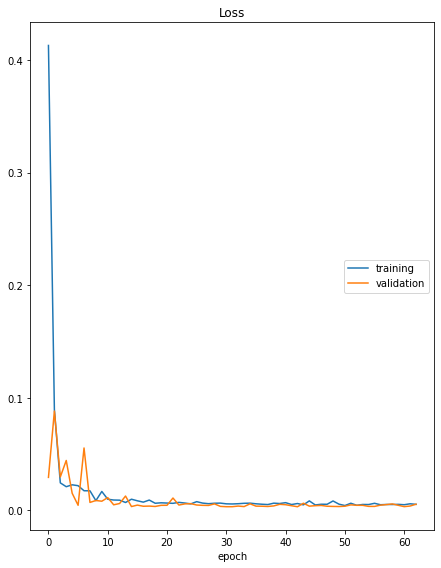

Loss
	training         	 (min:    0.004, max:    0.413, cur:    0.005)
	validation       	 (min:    0.003, max:    0.088, cur:    0.005)
Epoch 63: early stopping


In [155]:
K.clear_session()
best_model_mult = Sequential()
best_model_mult.add(Dense(best_ac[1], input_shape=(dims,),activation = best_ac[0]))

best_model_mult.add(Dense(best_ac[1]-round(best_ac[1]*0.8), activation = best_ac[0]))
best_model_mult.add(Dense(best_ac[1]-round(best_ac[1]*0.8), activation = best_ac[0]))
best_model_mult.add(Dropout(0.3))
best_model_mult.add(Dense(best_ac[1]-round(best_ac[1]*0.8), activation = best_ac[0]))

best_model_mult.add(Dense(1,activation=best_ac[0])) 
best_model_mult.compile(optimizer=best_fl[0], loss=best_fl[1]),
best_model_mult.fit(x_Train, y_Train, 
  verbose=0, 
  epochs=100, 
  validation_data=(x_Test, y_Test),
  callbacks=[PlotLossesKeras(),best_model, es])
  #callbacks=[PlotLossesKeras()])

In [158]:
len(best_model_mult.layers)

6

In [159]:
mse_capa_test_mult = mean_squared_error(y_Test,best_model_mult.predict(x_Test))
mae_capa_test_mult = mean_absolute_error(y_Test,best_model_mult.predict(x_Test))
mse_capa_train_mult = mean_squared_error(y_Train,best_model_mult.predict(x_Train))
mae_capa_train_mult = mean_absolute_error(y_Train,best_model_mult.predict(x_Train))
print(f'MSE Test:{mse_capa_test_mult}\nMAE Test:{mae_capa_test_mult}\nMSE Train:{mse_capa_train_mult}\nMAE Test:{mae_capa_train_mult}')

11/11 [==============================] - 0s 2ms/step
MSE Test:0.005384652539032164
MAE Test:0.05871153031984965
MSE Train:0.006046387859418341
MAE Test:0.06206094461168561


En este punto se utilizaron y dejaron estáticos los mejores hiper parámetros encontrado anteriormente: función de perdida, optimizador, cantidad de neuronas y la tasa de reducción de neuronas se aumento del 0.6 al 0.8 teniendo en cuenta que se implementaron más capas; adicionalmente, se implementó el método “early stopping” con una “patience” de 20 épocas, es decir que si la pérdida del modelo no cambia durante 20 épocas, la optimización de la función de perdida se detendrá, esto mejora considerablemente los tiempos de optimización y el desgaste computacional, y permite observar con mayor facilidad que modelos no están generando mejoras a través de las épocas. 


Por otro lado, se iteró sobre el número de capas, yendo desde 3 capas hasta 10 y añadiendo una capa extra de “Dropout” por cada 2 capas añadidas, esto precisamente para evitar el sobreajuste. Sin embargo, como fue posible observar a través de los modelos más simples, parece que el modelo en ningún momento sufrió de sobreajuste severo, ya que en ningún momento las gráficas de perdida de entrenamiento y validación divergieron considerablemente, por lo que se considera que probablemente para este conjunto de datos el “dropout” podría no ser muy efectivo. 


En conclusión, para este caso, los mejores resultados se lograron al implementar un total de seis capas: una capa de entrada, tres capas intermedias normales, una capa de dropout y finalmente una capa de salida.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

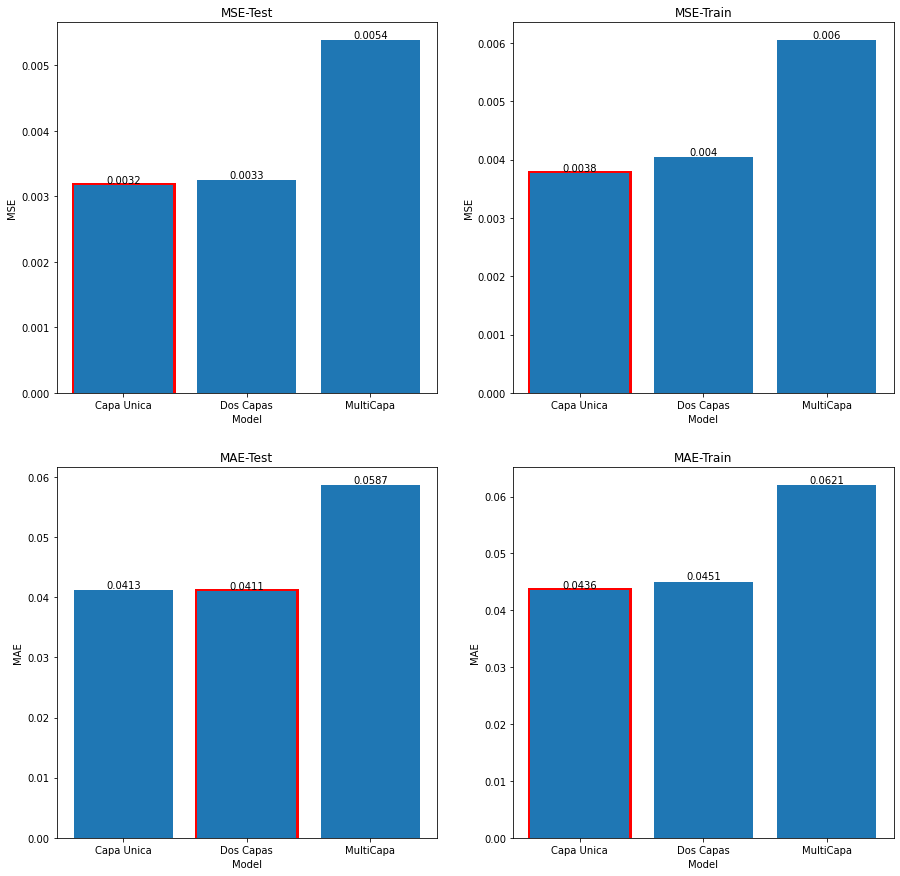

In [160]:
# Celda 4
#Train test
r = 2
c = 2

models_list = ['Capa Unica','Dos Capas','MultiCapa']

metrics_test_mse_list = [mse_capa_test,mse_capa2_test,mse_capa_test_mult]
metrics_test_mae_list = [mae_capa_test,mae_capa2_test,mae_capa_test_mult]
metrics_train_mse_list = [mse_capa_train,mse_capa2_train,mse_capa_train_mult]
metrics_train_mae_list = [mae_capa_train,mae_capa2_train,mae_capa_train_mult]

metrics = [metrics_test_mse_list,metrics_train_mse_list,metrics_test_mae_list,metrics_train_mae_list]

fig, axes = plt.subplots(r, c, figsize=(15, 15))

for j,i in enumerate(metrics):
    
    bars = axes[j//2, j%2].bar(models_list, i,color='blue')
    min_value = min(i)
    for bar in bars:
        if bar.get_height() == min_value:
            bar.set_linewidth(5)  
            bar.set_edgecolor('red') 
        axes[j//2, j%2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 4),
                             ha='center', va='bottom', color='black')
        if j <=1:
            t1='MSE'
        else:
            t1='MAE'
        if j%2==0:
            t2='Test'
        else:
            t2='Train'
        plt.title(f'{t1}-{t2}')
        
    ax = axes[j//2, j%2]
    ax.bar(models_list,i)
    ax.set_title(f'{t1}-{t2}')
    ax.set_xlabel('Model')
    ax.set_ylabel(t1)

Según los resultados obtenidos es posible observar que los mejores resultados, en MSE tanto en el conjunto de train como de test se obtuvieron por medio de la red neuronal simple de una única capa. Asimismo, el segundo mejor resultado fue el obtenido por medio de la red neuronal de dos capas, obteniendo el mejor resultado en MAE en el conjunto de test y el segundo mejor en train y test por medio de la métrica del MSE.

Es por esto, que es posible concluir que los mejores modelos para este conjunto de datos, como era de esperarse fueron aquellos más simples, esto, porque las relaciones manejadas en el dataset estudiado no eran muy complejas y constan principalmente de relaciones lineales simples positivas, por lo que probablemente el modelo multicapa y su naturaleza robusta para capturar relaciones complejas terminaron por entorpecer el proceso de aprendizaje y predicción.

**Red neuronal única capa:**

**Ventajas:**

- La simplicidad del modelo, debido a que no hay necesidad de calibración de muchos hiperparametros es sencillo de entrenar y de interpretar.
- Menor demanda de tiempo y menor demanda computacional al no tener que computar múltiples operaciones inherentes a las redes neuronales multicapa.
- Más robusta al sobreajuste, debido a la simplicidad y pocos parámetros es improbable que sufra de uno de los problemas mas comunes de las redes neuronales que es el sobreajuste.

**Desventajas:**

- Al ser un modelo simple puede tener problemas para cpturar relaciones complejas entre los datos, lo que puede llevar a un mal desempeño predictivo en modelos altamente complejos.

Para este caso es sencillo entender que el mejor resultado fue producto de la red neuronal mas simple, debido a que este modelo no posee relaciones complejas, pues en el análisis exploratorio pudimos observar que este conjunto de datos se compone principalmente de relaciones lineales positivas simples y fuertemente correlacionadas, por lo que es probable que incluso con un modelo de regresión lineal simple se puedan obtener buenos resultados.

**Red neuronal de dos capas:**

**Ventajas:**

- Es más flexible que el modelo de una sola capa, por lo que aunque sigue siendo simple, puede capturar con mayor facilidad relaciones un poco mas complejas que un modelo de única capa no podría.

**Desventajas:**

- Tiene una mayor demanda computacional y requiere mayor tiempo de entrenamiento que un modelo de una sola capa, debido a que ahora se requieren implementar cálculos matemáticos más complejos y hay mayor cantidad de hiperparametros.
- Mas complejo de entrenar y calibrar que un modelo de una única capa, en este modelo se deben implementar nuevos hiperparametros como la cantidad de neuronas y la función de activación a implementar en la capa intermedia.
- De igual forma es más propenso al sobreajuste, ya que deja de ser tan simple y puede llegar a capturar demasiado bien las características del conjunto de entrenamiento y nos ser muy bueno generalizando.

**Red neuronal de dos capas:**

**Ventajas:**

- Es más flexible que el modelo de una sola capa, por lo que aunque sigue siendo simple, puede capturar con mayor facilidad relaciones un poco mas complejas que un modelo de única capa no podría.

**Desventajas:**

- Tiene una mayor demanda computacional y requiere mayor tiempo de entrenamiento que un modelo de una sola capa, debido a que ahora se requieren implementar cálculos matemáticos más complejos y hay mayor cantidad de hiperparametros.
- Mas complejo de entrenar y calibrar que un modelo de una única capa, en este modelo se deben implementar nuevos hiperparametros como la cantidad de neuronas y la función de activación a implementar en la capa intermedia.
- De igual forma es más propenso al sobreajuste, ya que deja de ser tan simple y puede llegar a capturar demasiado bien las características del conjunto de entrenamiento y nos ser muy bueno generalizando.

**Red neuronal de multicapa:**

**Ventajas:**

- De todos los modelos implementados, es el más flexible de todos y puede  capturar con alta eficiencia relaciones altamente complejas, lo que hace que se puedan obtener modelos con alto poder predictivo en conjuntos de datos bastante complejos. Tienden a ser muy robustos para análisis de imágenes y análisis de texto.

**Desventajas:**

- Tiene una mayor demanda computacional y tiempos de entrenamiento al verse sujeto a gran cantidad de cálculos intermedios en el entrenamiento , sin embargo la implementación del early stopping mitiga un poco esto.
- De todos es aquel que es más complejo de calibrar y entrenar as complejo de entrenar y calibrar debido a la alta cantidad de hiperparametros que se deben tunear.
- Finalmente, es altamente propenso al sobreajuste al capturar de una excelente forma las relaciones entre los datos a través de las múltiples capas, por lo que incluso es necesario implementar técnicas de regularización para reducir la complejidad del modelo. Sin embargo, existen técnicas para mitigar el sobreajuste como la implementada en el presente trabajo, (“Dropout”) que permiten que el modelo no aprenda excesivamente bien las características del conjunto de train.
